In [1]:
import pandas as pd
import json
import pymongo
import matplotlib.dates as mdates
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
def data_import(include_mums=False):
    """Connects to database and creates dataframe containing all columns. Drops unneeded columns and sets timestamp
     datatype. Correct any incorrect time values, sets data times and sorts"""

    collection_list=['Times']
    
    if include_mums:
        collection_list.append('Mumsnet_Times')
    all_records = []

    # Connects to db and gets collection
    db = get_db()

    for collection in collection_list:
        records =list(db[collection].find())
        all_records.append(records)
    
    #Flattens list
    all_records = [val for sublist in all_records for val in sublist]
    
    df=pd.DataFrame(all_records)
    
    # Makes column to indicate which database times are from
    non_mums = ['Harvey Williams', 'Sazzle', 'Leah', 'Tom', 'Joe', 'George Sheen', 'Oliver Folkard'] 
    df['mum'] = np.where(df['user'].isin(non_mums), False, True)
    
    return df

In [3]:
def get_db(write=False):
    if write:
        connection_string = "admin_connection_string"

    else:
        connection_string = "connection_string"

    try:
        with open("local/pass.json") as file:
            file = json.loads(file.read())
            connection_string = file.get(connection_string)
            client = pymongo.MongoClient(
                connection_string)
            db = client["PlusWord"]
            return db
    except Exception as e:
        print(e)

In [4]:
def format_for_streamlit(df):
    """Makes df more readable, converts times into plottable numbers and sets index"""

    df = df[['load_ts', 'time', 'user']]
    df['time'] = df['time'].str.replace(r'(^\d\d:\d\d$)', r'00:\1', regex=True)
    df['load_ts'] = pd.to_datetime(df['load_ts'], format='%Y-%m-%d %H:%M:%S.%f')
    # df['user'] = df['user'].astype('category')
    df = df.sort_values(by=['load_ts'])
    df = df.rename(columns={'load_ts': 'timestamp'})
    df['time_delta'] = pd.to_timedelta(df['time'].astype('timedelta64[ns]'))
    df['time_delta_as_num'] = time_delta_to_num(pd.to_timedelta(df['time'].astype('string')))
    df['sub_time_delta_as_num'] = time_delta_to_num(pd.to_timedelta(df['timestamp'].dt.time.astype('string')))


    df = df.set_index('timestamp')
    df = df.sort_index(ascending=False)

    return df

In [5]:
def format_for_streamlit(df):
    """Makes df more readable, converts times into plottable numbers and sets index"""

    df = df[['load_ts', 'time', 'user', 'mum']]
    df['time'] = df['time'].str.replace(r'(^\d\d:\d\d$)', r'00:\1', regex=True)
    df['load_ts'] = pd.to_datetime(df['load_ts'], format='%Y-%m-%d %H:%M:%S.%f')
    # df['user'] = df['user'].astype('category')
    df = df.sort_values(by=['load_ts'])
    df = df.rename(columns={'load_ts': 'timestamp'})
    df['time_delta'] = pd.to_timedelta(df['time'].astype('timedelta64[ns]'))
    df['time_delta_as_num'] = time_delta_to_num(pd.to_timedelta(df['time'].astype('string')))
    df['sub_time_delta_as_num'] = time_delta_to_num(pd.to_timedelta(df['timestamp'].dt.time.astype('string')))


    df = df.set_index('timestamp')
    df = df.sort_index(ascending=False)

    return df


In [6]:
def time_delta_to_num(time_delta):
    """ Takes in time delta and converts it into a number for plotting"""

    # specify a date to use for the times

    zero_date = datetime(2022, 6, 20)

    zero_num = mdates.date2num(zero_date)

    # adds zero_data to timedelta to convert

    time_delta_plus_date = [zero_date + time_unit for time_unit in time_delta]

    # convert datetimes to numbers

    time_delta_as_num = [mins - zero_num for mins in mdates.date2num(time_delta_plus_date)]

    return time_delta_as_num

In [7]:
df=data_import(include_mums=True)
df = format_for_streamlit(df)

/tmp/ipykernel_41919/1743044916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['time'].str.replace(r'(^\d\d:\d\d$)', r'00:\1', regex=True)
/tmp/ipykernel_41919/1743044916.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['load_ts'] = pd.to_datetime(df['load_ts'], format='%Y-%m-%d %H:%M:%S.%f')


In [8]:
df

,time,user,mum,time_delta,time_delta_as_num,sub_time_delta_as_num
timestamp,,,,,,
2023-06-24 16:47:13.494,00:00:30,Oliver Folkard,False,0 days 00:00:30,0.000347,0.699462
2023-06-24 13:05:17.639,00:00:41,George Sheen,False,0 days 00:00:41,0.000475,0.545343
2023-06-24 12:49:00.000,00:00:40,IGoWalkingAfterMidnight,True,0 days 00:00:40,0.000463,0.534028
2023-06-24 09:35:00.000,00:00:58,Floralnomad,True,0 days 00:00:58,0.000671,0.399306
2023-06-24 09:24:05.270,00:01:19,Joe,False,0 days 00:01:19,0.000914,0.391728
...,...,...,...,...,...,...
2022-06-04 09:45:00.000,00:36:59,Joe,False,0 days 00:36:59,0.025683,0.406250
2022-06-04 00:24:00.000,00:13:16,Harvey Williams,False,0 days 00:13:16,0.009213,0.016667
2022-06-03 13:29:00.000,00:14:48,Harvey Williams,False,0 days 00:14:48,0.010278,0.561806


In [9]:
df.user.value_counts()

Joe                        345
Harvey Williams            314
Tom                        312
Oliver Folkard             305
George Sheen               302
Floralnomad                210
MarmiteWine                205
JoyDivisionOvenGlovesx     202
Drywhitefruitycidergin     196
DadDadDad                  183
Sunbird24                  180
Readytostartagain          160
IGoWalkingAfterMidnight    124
Sazzle                     105
Stokey                      99
Leah                        77
Hepzibar                    75
hoochyhag                   66
Albaniarocks                66
UmbilicusProfundus          64
oviraptor21                 62
hoochycrone                 45
sanityisamyth               36
Buttalapasta                27
LikeTearsInRain             18
AngeloMysterioso            16
Swissnotswiss               15
Madcats                     15
BrilliantGreenFlamingo      15
Pollywoddles                11
bruffin                     10
BlandSoup                    9
Welshwab

In [10]:
less_than_5_entries = df['user'].value_counts() > 5


In [11]:
less_than_5_entries

Joe                         True
Harvey Williams             True
Tom                         True
Oliver Folkard              True
George Sheen                True
Floralnomad                 True
MarmiteWine                 True
JoyDivisionOvenGlovesx      True
Drywhitefruitycidergin      True
DadDadDad                   True
Sunbird24                   True
Readytostartagain           True
IGoWalkingAfterMidnight     True
Sazzle                      True
Stokey                      True
Leah                        True
Hepzibar                    True
hoochyhag                   True
Albaniarocks                True
UmbilicusProfundus          True
oviraptor21                 True
hoochycrone                 True
sanityisamyth               True
Buttalapasta                True
LikeTearsInRain             True
AngeloMysterioso            True
Swissnotswiss               True
Madcats                     True
BrilliantGreenFlamingo      True
Pollywoddles                True
bruffin   

In [12]:
df = df.groupby(df["user"])["time_delta_as_num"].max()
df

user
Albaniarocks               0.001759
AngeloMysterioso           0.006447
BakeOffRewatch             0.000451
BarkHorse                  0.001100
BlandSoup                  0.004965
BrilliantGreenFlamingo     0.008148
Buttalapasta               0.011007
DadDadDad                  0.014514
Drywhitefruitycidergin     0.010764
FaazoHuyzeoSix             0.001319
FeinCuroxiVooz             0.001192
Floralnomad                0.002500
George Sheen               0.011644
Harvey Williams            0.034560
Hepzibar                   0.003831
IGoWalkingAfterMidnight    0.004769
Joe                        0.025683
JoyDivisionOvenGlovesx     0.005197
LaChatte                   0.000567
Leah                       0.014097
LikeTearsInRain            0.005081
Madcats                    0.003646
MarmiteWine                0.013252
Oliver Folkard             0.017407
PenguinsCantFly            0.004352
Piemam                     0.000799
Pollywoddles               0.002801
Readytostartagain      

In [13]:
df = df[less_than_5_entries]
df

user
Albaniarocks               0.001759
AngeloMysterioso           0.006447
BlandSoup                  0.004965
BrilliantGreenFlamingo     0.008148
Buttalapasta               0.011007
DadDadDad                  0.014514
Drywhitefruitycidergin     0.010764
Floralnomad                0.002500
George Sheen               0.011644
Harvey Williams            0.034560
Hepzibar                   0.003831
IGoWalkingAfterMidnight    0.004769
Joe                        0.025683
JoyDivisionOvenGlovesx     0.005197
Leah                       0.014097
LikeTearsInRain            0.005081
Madcats                    0.003646
MarmiteWine                0.013252
Oliver Folkard             0.017407
Pollywoddles               0.002801
Readytostartagain          0.003877
Sazzle                     0.009560
Stokey                     0.005949
Sunbird24                  0.002118
Swissnotswiss              0.005868
Tom                        0.025081
UmbilicusProfundus         0.004190
Welshwabbit            

In [14]:
df = df.reset_index()

df = df.sort_values(by='time_delta_as_num', ascending=False)
df

,user,time_delta_as_num
9,Harvey Williams,0.034560
12,Joe,0.025683
25,Tom,0.025081
31,hoochyhag,0.018171
18,Oliver Folkard,0.017407
32,ifIwerenotanandroid,0.015093
5,DadDadDad,0.014514
14,Leah,0.014097
17,MarmiteWine,0.013252
30,hoochycrone,0.011725


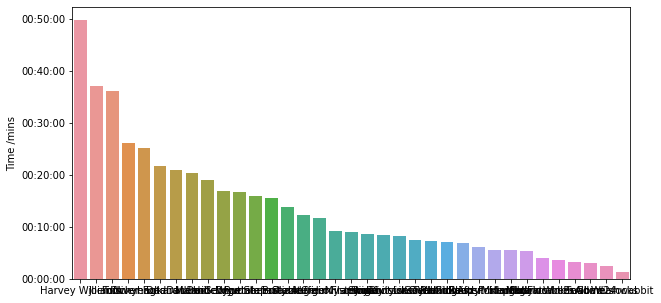

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))

fig = sns.barplot(data=df,
                  x="user",
                  y="time_delta_as_num",
                  ).set(
    ylabel='Time /mins',
    xlabel=None)

ax.yaxis_date()

ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))

plt.show()

In [43]:
pal = sns.color_palette("hls", 20)

In [44]:
pal

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5272, 0.33999999999999997),
 (0.86, 0.6832, 0.33999999999999997),
 (0.86, 0.8392000000000002, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.41279999999999994, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.42320000000000013),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.86, 0.7352000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.6727999999999997, 0.86),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.33999999999999997, 0.36079999999999973, 0.86),
 (0.4752000000000003, 0.33999999999999997, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.7767999999999993),
 (0.86, 0.33999999999999997, 0.6207999999999999),
 (0.86, 0.33999999999999997, 0.46479999999999977)]

1